In [6]:
import json
import os

# Set the path to the LLMs folder
folder_path = "LLMs"

# Read each JSON file into its corresponding dictionary
labelD = json.load(open(os.path.join(folder_path, 'labels.json'), encoding='utf-8'))

gptD = json.load(open(os.path.join(folder_path, 'GPT-4o.json'), encoding='utf-8'))
cldD = json.load(open(os.path.join(folder_path, 'claude-3-sonnet.json'), encoding='utf-8'))
gemD = json.load(open(os.path.join(folder_path, 'gemini-2.0-flash-exp.json'), encoding='utf-8'))
glmD = json.load(open(os.path.join(folder_path, 'GLM-4V-Plus.json'), encoding='utf-8'))
lamD = json.load(open(os.path.join(folder_path, 'Llama-3.2-90B.json'), encoding='utf-8'))
qwnD = json.load(open(os.path.join(folder_path, 'Qwen-QVQ-72B-Preview.json'), encoding='utf-8'))

In [14]:
import json
import os
from collections import OrderedDict

def merge_dicts_to_lists(dicts_list):
    # Create an OrderedDict to maintain key order
    merged = OrderedDict()
    
    # Generate keys in order from "0001" to "3529"
    ordered_keys = [f"{i:04d}" for i in range(1, 3530)]
    
    # For each key in order, create a list of values from each dictionary
    for key in ordered_keys:
        merged[key] = [d[key] for d in dicts_list]
    
    return merged

# Create list of dictionaries in the desired order
dicts_list = [labelD, gptD, cldD, gemD, glmD, lamD, qwnD]

# Merge dictionaries
merged_dict = merge_dicts_to_lists(dicts_list)

# Save to JSON file
output_path = os.path.join(folder_path, 'merged_results.json')
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(merged_dict, f, ensure_ascii=False, indent=2)

In [22]:
prompt= """
Task: Evaluate image recognition results from 6 different LLMs against a standard label.

Input Format:
- A list of 7 strings
- Index 0: Standard label (may contain multiple acceptable answers separated by semicolons)
- Indices 1-6: Recognition results from 6 different LLMs

Evaluation Rules:
1. Compare each LLM's response to the standard label
2. For multiple predictions from an LLM:
   - Use the most confident prediction if confidence levels are indicated
   - Use the first prediction if multiple equal predictions are given
3. For labels with multiple acceptable answers (separated by semicolons), matching any one answer is considered correct

Output Format:
- A list of 6 binary values (1 for correct, 0 for incorrect)

Example:
Input: ["Amy Winehouse", "Amy Winehouse", "The image appears to be a cartoonish depiction resembling Amy Winehouse...", "Jennifer Aniston", "The image is a depiction of Amy Winehouse.", "The image appears to be a cartoon representation of Amy Winehouse...", "Dark hair... (followed by multiple suggestions including Selena Gomez, Rihanna...)"]
Output: [1,1,0,1,1,0]

INPUT:

"""

In [16]:
key = "sk-71772336d5c54b3f8ecd4f177a559e87"

In [25]:
# Please install OpenAI SDK first: `pip3 install openai`

from openai import OpenAI
result={}
client = OpenAI(api_key=key, base_url="https://api.deepseek.com")

response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": prompt+ str(merged_dict["0001"])},
    ],
    stream=False
)
result["0001"] = response.choices[0].message.content
print(response.choices[0].message.content)

Output: [0, 0, 0, 0, 1, 0]

Explanation:
- **LLM 1**: "Dolly Parton" does not match the standard label "Adele". (0)
- **LLM 2**: The response does not identify any specific individual, so it does not match "Adele". (0)
- **LLM 3**: "Taylor Swift" does not match the standard label "Adele". (0)
- **LLM 4**: The response states it cannot identify the celebrity, so it does not match "Adele". (0)
- **LLM 5**: The response suggests "Adele" as a possible match, which is correct. (1)
- **LLM 6**: The response does not clearly identify "Adele" and instead speculates without a definitive answer, so it does not match. (0)


In [35]:
import requests


url = "https://api.ainewserver.com/v1/chat/completions"

headers = {
    "Authorization": "xxx",
    "content-type": "application/json"
}
data = {
    "messages": [
        {
            "role": "user",
            "content": "hello,can you process long text,answer concisely",
        }
    ],
    "model": "gemini-2.0-flash-exp"
}

response = requests.post(url, headers=headers, json=data)
data = json.loads(response.text)
value = data['choices'][0]['message']['content']   
print(value)

Yes, I can process long text and answer concisely.



In [54]:
# read merged_results
import json

with open('LLMs/merged_results.json', 'r', encoding='utf-8') as file:
    merged_dict = json.load(file)

print(len(merged_dict))


3529


In [64]:
import json

# Read the first JSON file
with open('json/labels.json', 'r') as file1:
    dic1 = json.load(file1)

# Read the second JSON file
with open('json/result_3.json', 'r') as file2:
    dic2 = json.load(file2)

# Create a new dictionary to store merged results
merged_dict = {}

# Merge the dictionaries
for key in dic1.keys():
    merged_dict[key] = [dic1[key], dic2[key]]

# Save the merged dictionary to a new JSON file
with open('result_4.json', 'w', encoding='utf-8') as outfile:
    json.dump(merged_dict, outfile, indent=4)

In [94]:
import json

# Read the original JSON file
with open('json/result_3.json', 'r') as file:
    data = json.load(file)


with open('output.json', 'w') as file:
    json.dump(data, file, separators=(',', ':'))

In [99]:
import json

# Read the original JSON file
# Read the original JSON file
with open('output.json', 'r') as file:
    data = json.load(file)

# Save to a new JSON file with custom formatting
with open('output2.json', 'w') as file:
    # Opening brace
    file.write('{\n')
    
    # Get all keys
    keys = list(data.keys())
    
    # Iterate through items
    for i, key in enumerate(keys):
        # Format each value compactly
        compact_value = json.dumps(data[key], separators=(',', ':'))
        
        # Write key-value pair
        if i < len(keys) - 1:
            file.write(f'    "{key}": {compact_value},\n')
        else:
            file.write(f'    "{key}": {compact_value}\n')
    
    # Closing brace
    file.write('}')

In [98]:
import json

def count_image_types(json_file):
    # Read the JSON file
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    # Count image types
    counts = {}
    for item in data.values():
        image_type = item[-1]  # Get the last element of the list
        counts[image_type] = counts.get(image_type, 0) + 1
    
    return counts

# Example usage:
result = count_image_types('json/label.json')
print(result)

{'Memoji': 88, 'Caricature': 959, 'Cartoon': 46, 'Minimalism': 149, 'Iconography': 1, 'Emoji Combination': 649, 'Symbolism': 128, 'Visual Pun': 692, 'Illustration': 813, 'Surrealism': 4}


In [170]:
import json

def sum_binary_lists(json_file, category):
    # Read data from JSON file
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    # Initialize list to store sums for each position 
    sums = [0] * 6
    
    # Iterate through each item in the data
    for key, value in data.items():
        # Check if item matches the requested category
        if value[3] == category:
            # Add up binary values at each position
            binary_list = value[4]
            for i in range(6):
                sums[i] += binary_list[i]
                
    return sums

# Example usage:
json_file = "json/label.json"  # Replace with your JSON file path
print("Memoji:", sum_binary_lists(json_file, "Memoji"))
print("Caricature:", sum_binary_lists(json_file, "Caricature"))
print("Cartoon:", sum_binary_lists(json_file, "Cartoon"))
print("Minimalism:", sum_binary_lists(json_file, "Minimalism"))
print("Symbolism:", sum_binary_lists(json_file, "Symbolism"))
print("Illustration:", sum_binary_lists(json_file, "Illustration"))
print("Visual Pun:", sum_binary_lists(json_file, "Visual Pun"))
print("Emoji Combination:", sum_binary_lists(json_file, "Emoji Combination"))

# la = [1024,668,954,883]
total=[88,959,46,149,128,813,692,649]

Memoji: [44, 59, 81, 38, 64, 39]
Caricature: [426, 422, 869, 576, 543, 308]
Cartoon: [37, 30, 41, 32, 30, 21]
Minimalism: [108, 76, 113, 84, 83, 48]
Symbolism: [101, 66, 104, 58, 79, 37]
Illustration: [688, 611, 667, 536, 515, 341]
Visual Pun: [475, 294, 405, 250, 216, 132]
Emoji Combination: [536, 370, 465, 233, 247, 139]


In [109]:
# Define the data
public_figures = [442, 417, 905, 576, 554, 335]
popular_media = [542, 454, 551, 364, 409, 205] 
linguistic = [691, 400, 583, 303, 272, 160]
literary = [743, 658, 710, 564, 542, 366]
totals = [1024, 668, 954, 883]

# Calculate recognition accuracy for each category
public_figures_accuracy = [round(x/totals[0] * 100, 2) for x in public_figures]
popular_media_accuracy = [round(x/totals[1] * 100, 2) for x in popular_media]
linguistic_accuracy = [round(x/totals[2] * 100, 2) for x in linguistic]
literary_accuracy = [round(x/totals[3] * 100, 2) for x in literary]

# Print results
print("Public Figures Recognition Accuracy (%):", public_figures_accuracy)
print("Popular Media Recognition Accuracy (%):", popular_media_accuracy)
print("Linguistic Recognition Accuracy (%):", linguistic_accuracy)
print("Literary Works Recognition Accuracy (%):", literary_accuracy)


Public Figures Recognition Accuracy (%): [43.16, 40.72, 88.38, 56.25, 54.1, 32.71]
Popular Media Recognition Accuracy (%): [81.14, 67.96, 82.49, 54.49, 61.23, 30.69]
Linguistic Recognition Accuracy (%): [72.43, 41.93, 61.11, 31.76, 28.51, 16.77]
Literary Works Recognition Accuracy (%): [84.14, 74.52, 80.41, 63.87, 61.38, 41.45]


In [108]:
# Define the accuracies
public_figures_accuracy = [43.16, 40.72, 88.38, 56.25, 54.1, 32.71]
popular_media_accuracy = [81.14, 67.96, 82.49, 54.49, 61.23, 30.69]
linguistic_accuracy = [72.43, 41.93, 61.11, 31.76, 28.51, 16.77]
literary_accuracy = [84.14, 74.52, 80.41, 63.87, 61.38, 41.45]

# Calculate both averages for each LLM
results = []
for i in range(len(public_figures_accuracy)):
    # Average with public figures (all 4 categories)
    avg_with_public = (public_figures_accuracy[i] + popular_media_accuracy[i] + 
                      linguistic_accuracy[i] + literary_accuracy[i]) / 4
    
    # Average without public figures (3 categories)
    avg_without_public = (popular_media_accuracy[i] + linguistic_accuracy[i] + 
                         literary_accuracy[i]) / 3
    
    results.append({
        'LLM': i+1,
        'With Public Figures': round(avg_with_public, 2),
        'Without Public Figures': round(avg_without_public, 2)
    })

# Print results
print("Recognition Accuracies:")
print("\nLLM | With Public Figures | Without Public Figures")
print("-" * 45)
for item in results:
    print(f"LLM {item['LLM']} | {item['With Public Figures']}% | {item['Without Public Figures']}%")
LLMs = ["GPT", "Claude", "Gemini", "GLM", "Llama", "Qwen"]

Recognition Accuracies:

LLM | With Public Figures | Without Public Figures
---------------------------------------------
LLM 1 | 70.22% | 79.24%
LLM 2 | 56.28% | 61.47%
LLM 3 | 78.1% | 74.67%
LLM 4 | 51.59% | 50.04%
LLM 5 | 51.3% | 50.37%
LLM 6 | 30.41% | 29.64%


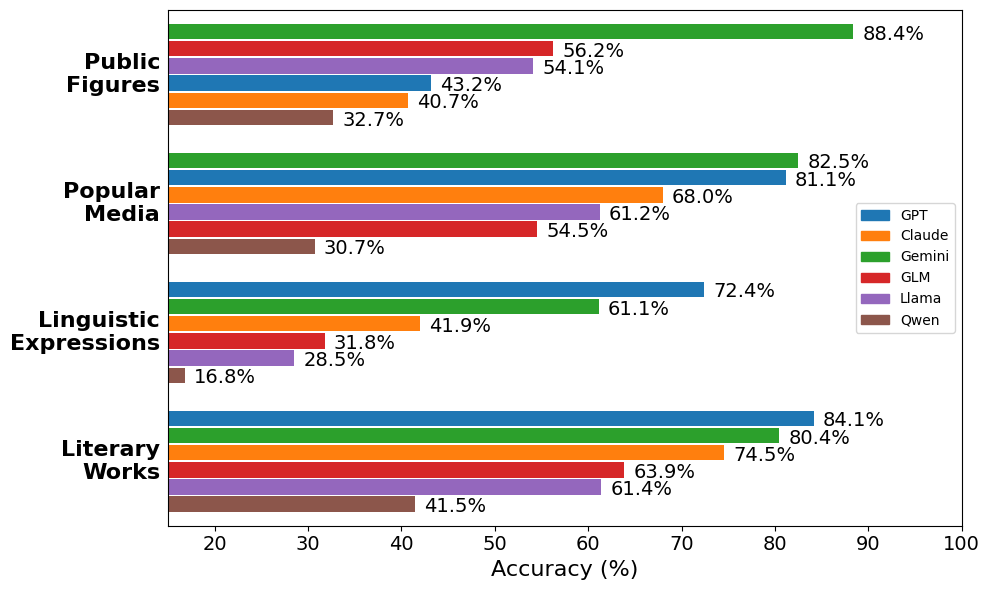

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Data lists for four datasets and six LLMs
public_figures_accuracy = [43.16, 40.72, 88.38, 56.25, 54.1, 32.71]
popular_media_accuracy   = [81.14, 67.96, 82.49, 54.49, 61.23, 30.69]
linguistic_accuracy      = [72.43, 41.93, 61.11, 31.76, 28.51, 16.77]
literary_accuracy        = [84.14, 74.52, 80.41, 63.87, 61.38, 41.45]
LLMs = ["GPT", "Claude", "Gemini", "GLM", "Llama", "Qwen"]

# Fixed color mapping for consistency using common academic-friendly colors.
colors = {
    "GPT": "#1f77b4",     # blue
    "Claude": "#ff7f0e",  # orange
    "Gemini": "#2ca02c",  # green
    "GLM": "#d62728",     # red
    "Llama": "#9467bd",   # purple
    "Qwen": "#8c564b"     # brown
}

# Pack datasets with their names in the desired vertical order.
# Public Figures at the top, followed by Popular Media, Linguistic, Literary.
datasets = [
    ("Public\nFigures", public_figures_accuracy),
    ("Popular\nMedia", popular_media_accuracy),
    ("Linguistic\nExpressions", linguistic_accuracy),
    ("Literary\nWorks", literary_accuracy)
]

n_datasets = len(datasets)
n_models = len(LLMs)

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Remove the default y-axis tick labels (the numbers)
ax.set_yticks([])

# Set horizontal (x-axis) range from 15% to 100%
plt.xlim(15, 100)

# Set the font size of the horizontal coordinate tick labels.
plt.xticks(fontsize=14)

# Define a total height for each dataset group.
group_height = 0.8  
# Compute the vertical space allocated per bar slot.
bar_slot = group_height / n_models  
# Use a fraction of the slot height for each bar (to leave some gaps).
bar_height = bar_slot * 0.9  

# Loop over each dataset cluster.
# To display Public Figures at the top, assign cluster center positions in reverse order.
for i, (dataset_name, accuracies) in enumerate(datasets):
    # Compute the cluster center: highest y for Public Figures, then descending.
    cluster_center = (n_datasets - 1) - i
    group_bottom = cluster_center - group_height / 2

    # Convert the accuracy list to a NumPy array.
    acc_array = np.array(accuracies)
    # Sort indices in descending order so that the highest accuracy comes first.
    sorted_indices = np.argsort(-acc_array)
    
    # For each sorted bar, assign a slot such that the highest accuracy is in the top slot.
    for k, idx in enumerate(sorted_indices):
        # Reverse slot order: top slot index is (n_models-1) and bottom is 0.
        slot_idx = (n_models - 1) - k
        y_center = group_bottom + (slot_idx + 0.5) * bar_slot
        width = acc_array[idx]
        plt.barh(y=y_center, width=width, height=bar_height, color=colors[LLMs[idx]])
        # Put the accuracy value just to the right of the bar.
        plt.text(width + 1, y_center - 0.02, f"{width:.1f}%", va='center', fontsize=14)

    # Label the dataset along the left margin using the y-axis transform so it stays visible.
    # Changing the x-coordinate from -0.05 to -0.01 brings the text closer to the vertical axis.
    ax.text(-0.01, cluster_center, dataset_name,
            transform=ax.get_yaxis_transform(),
            ha='right', va='center',
            fontsize=16, fontweight='bold')

# Set the x-axis label with font size 14.
plt.xlabel("Accuracy (%)", fontsize=16)
# plt.title("Grouped Horizontal Bar Chart of LLM Accuracy Across Datasets")
plt.ylim(-0.5, n_datasets - 0.5)

# Create a custom legend mapping colors to LLM names.
legend_handles = [mpatches.Patch(color=colors[llm], label=llm) for llm in LLMs]
plt.legend(handles=legend_handles, loc='center right')

plt.tight_layout()
# Save the image with tight edges.
plt.savefig("llm_accuracy.png", bbox_inches='tight')
plt.show()

In [172]:
# Define the art style lists as tuples (name, list of values)
categories = [
    ("Memoji", [44, 59, 81, 38, 64, 39]),
    ("Caricature", [426, 422, 869, 576, 543, 308]),
    ("Cartoon", [37, 30, 41, 32, 30, 21]),
    ("Minimalism", [108, 76, 113, 84, 83, 48]),
    ("Symbolism", [101, 66, 104, 58, 79, 37]),
    ("Illustration", [688, 611, 667, 536, 515, 341]),
    ("Visual Pun", [475, 294, 405, 250, 216, 132]),
    ("Emoji Combination", [536, 370, 465, 233, 247, 139])
]

# The corresponding total values for each category
totals = [88, 959, 46, 149, 128, 813, 692, 649]

# Dictionary to store results
results = {}

# Iterate over the categories and corresponding total values
for index, (name, numbers) in enumerate(categories):
    total_value = totals[index]
    # Perform the division for each element in the current category list
    ratios = [round(num / total_value, 4) for num in numbers]
    results[name] = ratios

# Print out the results
for category, values in results.items():
    print(f"{category}: {values}")

Memoji: [0.5, 0.6705, 0.9205, 0.4318, 0.7273, 0.4432]
Caricature: [0.4442, 0.44, 0.9062, 0.6006, 0.5662, 0.3212]
Cartoon: [0.8043, 0.6522, 0.8913, 0.6957, 0.6522, 0.4565]
Minimalism: [0.7248, 0.5101, 0.7584, 0.5638, 0.557, 0.3221]
Symbolism: [0.7891, 0.5156, 0.8125, 0.4531, 0.6172, 0.2891]
Illustration: [0.8462, 0.7515, 0.8204, 0.6593, 0.6335, 0.4194]
Visual Pun: [0.6864, 0.4249, 0.5853, 0.3613, 0.3121, 0.1908]
Emoji Combination: [0.8259, 0.5701, 0.7165, 0.359, 0.3806, 0.2142]


In [173]:
# Define the recognition accuracy values for each presentation method
presentation_methods = {
    "Memoji": [0.5, 0.6705, 0.9205, 0.4318, 0.7273, 0.4432],
    "Caricature": [0.4442, 0.44, 0.9062, 0.6006, 0.5662, 0.3212],
    "Cartoon": [0.8043, 0.6522, 0.8913, 0.6957, 0.6522, 0.4565],
    "Minimalism": [0.7248, 0.5101, 0.7584, 0.5638, 0.557, 0.3221],
    "Symbolism": [0.7891, 0.5156, 0.8125, 0.4531, 0.6172, 0.2891],
    "Illustration": [0.8462, 0.7515, 0.8204, 0.6593, 0.6335, 0.4194],
    "Visual Pun": [0.6864, 0.4249, 0.5853, 0.3613, 0.3121, 0.1908],
    "Emoji Combination": [0.8259, 0.5701, 0.7165, 0.359, 0.3806, 0.2142]
}

# List of LLM names in order
LLMs = ["GPT", "Claude", "Gemini", "GLM", "Llama", "Qwen"]

# Approach 1: Using a loop to build the transposed dictionary
transposed = {llm: [] for llm in LLMs}

for method, values in presentation_methods.items():
    for i, llm in enumerate(LLMs):
        transposed[llm].append(values[i])

print("Transposed data using explicit loops:")
for llm, accuracies in transposed.items():
    print(f"{llm}: {accuracies}")

# ---------------------------------------------------------------
# Approach 2: Using zip to transpose the values
# First, get the list of all presentation method names to retain ordering if needed.
methods = list(presentation_methods.keys())
# Use zip to transpose the list of lists from the presentation methods
transposed_values = list(zip(*[presentation_methods[method] for method in methods]))

transposed_zip = {llm: list(acc) for llm, acc in zip(LLMs, transposed_values)}

print("\nTransposed data using zip:")
for llm, accuracies in transposed_zip.items():
    print(f"{llm}: {accuracies}")

Transposed data using explicit loops:
GPT: [0.5, 0.4442, 0.8043, 0.7248, 0.7891, 0.8462, 0.6864, 0.8259]
Claude: [0.6705, 0.44, 0.6522, 0.5101, 0.5156, 0.7515, 0.4249, 0.5701]
Gemini: [0.9205, 0.9062, 0.8913, 0.7584, 0.8125, 0.8204, 0.5853, 0.7165]
GLM: [0.4318, 0.6006, 0.6957, 0.5638, 0.4531, 0.6593, 0.3613, 0.359]
Llama: [0.7273, 0.5662, 0.6522, 0.557, 0.6172, 0.6335, 0.3121, 0.3806]
Qwen: [0.4432, 0.3212, 0.4565, 0.3221, 0.2891, 0.4194, 0.1908, 0.2142]

Transposed data using zip:
GPT: [0.5, 0.4442, 0.8043, 0.7248, 0.7891, 0.8462, 0.6864, 0.8259]
Claude: [0.6705, 0.44, 0.6522, 0.5101, 0.5156, 0.7515, 0.4249, 0.5701]
Gemini: [0.9205, 0.9062, 0.8913, 0.7584, 0.8125, 0.8204, 0.5853, 0.7165]
GLM: [0.4318, 0.6006, 0.6957, 0.5638, 0.4531, 0.6593, 0.3613, 0.359]
Llama: [0.7273, 0.5662, 0.6522, 0.557, 0.6172, 0.6335, 0.3121, 0.3806]
Qwen: [0.4432, 0.3212, 0.4565, 0.3221, 0.2891, 0.4194, 0.1908, 0.2142]


In [175]:
# Define the recognition accuracy lists for each LLM
llms = {
    "Gemini": [0.9205, 0.9062, 0.8913, 0.7584, 0.8125, 0.8204, 0.5853, 0.7165],
    "GPT":    [0.5   , 0.4442, 0.8043, 0.7248, 0.7891, 0.8462, 0.6864, 0.8259],
    "Claude": [0.6705, 0.44  , 0.6522, 0.5101, 0.5156, 0.7515, 0.4249, 0.5701],
    "GLM":    [0.4318, 0.6006, 0.6957, 0.5638, 0.4531, 0.6593, 0.3613, 0.3590],
    "Llama":  [0.7273, 0.5662, 0.6522, 0.557 , 0.6172, 0.6335, 0.3121, 0.3806],
    "Qwen":   [0.4432, 0.3212, 0.4565, 0.3221, 0.2891, 0.4194, 0.1908, 0.2142]
}

# Calculate the average for each LLM and print the result
for name, accuracies in llms.items():
    average = sum(accuracies) / len(accuracies)
    print(f"{name} Average Accuracy: {average:.4f}")

GPT Average Accuracy: 0.7026
Gemini Average Accuracy: 0.8014
Claude Average Accuracy: 0.5669
GLM Average Accuracy: 0.5156
Llama Average Accuracy: 0.5558
Qwen Average Accuracy: 0.3321


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11164\2042135413.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = plt.cm.get_cmap("viridis", len(closed_sourced))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11164\2042135413.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors2 = plt.cm.get_cmap("viridis", len(open_sourced))


Figure saved to output_figures\radar_plot.png


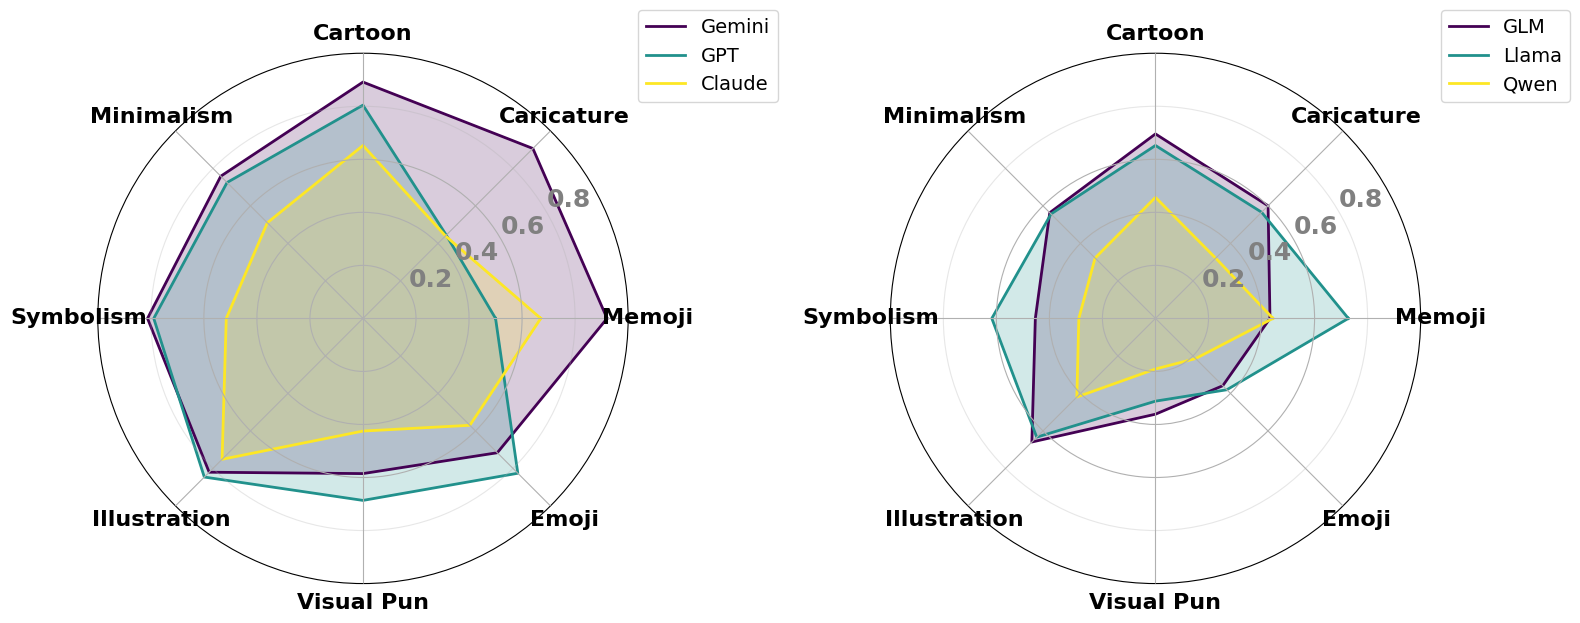

In [239]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data for each LLM (8 presentation methods)
llms = {
    "Gemini": [0.9205, 0.9062, 0.8913, 0.7584, 0.8125, 0.8204, 0.5853, 0.7165],
    "GPT":    [0.5,    0.4442, 0.8043, 0.7248, 0.7891, 0.8462, 0.6864, 0.8259],
    "Claude": [0.6705, 0.44,   0.6522, 0.5101, 0.5156, 0.7515, 0.4249, 0.5701],
    "GLM":    [0.4318, 0.6006, 0.6957, 0.5638, 0.4531, 0.6593, 0.3613, 0.3590],
    "Llama":  [0.7273, 0.5662, 0.6522, 0.557,  0.6172, 0.6335, 0.3121, 0.3806],
    "Qwen":   [0.4432, 0.3212, 0.4565, 0.3221, 0.2891, 0.4194, 0.1908, 0.2142]
}

# Presentation methods in the given order
presentation_methods = [
    "Memoji", "Caricature", "Cartoon", "Minimalism",
    "Symbolism", "Illustration", "Visual Pun", "Emoji"
]

# Grouping the LLMs into closed sourced and open sourced
closed_sourced = ["Gemini", "GPT", "Claude"]
open_sourced   = ["GLM", "Llama", "Qwen"]

# Number of presentation methods used
num_vars = len(presentation_methods)

# Compute angles for each axis (in radians)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]  # Complete the polygon by repeating the first angle

# Function to set up a radar chart's common layout with larger and bolder fonts
def setup_ax(ax):
    # Ensure gridlines are drawn below text by default
    ax.set_axisbelow(False)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(presentation_methods, fontsize=16, fontweight='bold')
    # Bring tick labels to the front
    for label in ax.get_xticklabels():
        label.set_zorder(10)
        
    ax.set_rlabel_position(30)
    yticks = [0.2, 0.4, 0.6, 0.8]
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(yt) for yt in yticks],
                       fontsize=18, color="grey", fontweight='bold')
    ax.set_ylim(0, 1)
    
    # Make the outer circle (the gridline at r=1) somewhat transparent.
    gridlines = ax.yaxis.get_gridlines()
    if gridlines:
        gridlines[-1].set_alpha(0.3)  # Adjust transparency for the outermost circle

# Create a figure with two radar-subplots (one for each group)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

# Set common layout for each subplot
setup_ax(ax1)
setup_ax(ax2)

# Plotting closed sourced LLMs (left subplot)
colors1 = plt.cm.get_cmap("viridis", len(closed_sourced))
for idx, llm in enumerate(closed_sourced):
    values = llms[llm] + [llms[llm][0]]  # Complete the polygon loop
    ax1.plot(angles, values, linewidth=2, linestyle='solid', label=llm, color=colors1(idx))
    ax1.fill(angles, values, alpha=0.2, color=colors1(idx))
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=14)

# Plotting open sourced LLMs (right subplot)
colors2 = plt.cm.get_cmap("viridis", len(open_sourced))
for idx, llm in enumerate(open_sourced):
    values = llms[llm] + [llms[llm][0]]
    ax2.plot(angles, values, linewidth=2, linestyle='solid', label=llm, color=colors2(idx))
    ax2.fill(angles, values, alpha=0.2, color=colors2(idx))
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=14)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Specify the output folder and file name
output_folder = "output_figures"
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, "radar_plot.png")

# Save the figure with tight spacing (using bbox_inches='tight')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {output_path}")

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11164\3505999724.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = plt.cm.get_cmap("viridis", len(closed_sourced))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11164\3505999724.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors2 = plt.cm.get_cmap("viridis", len(open_sourced))


Figure saved to output_figures\radar_plot.png


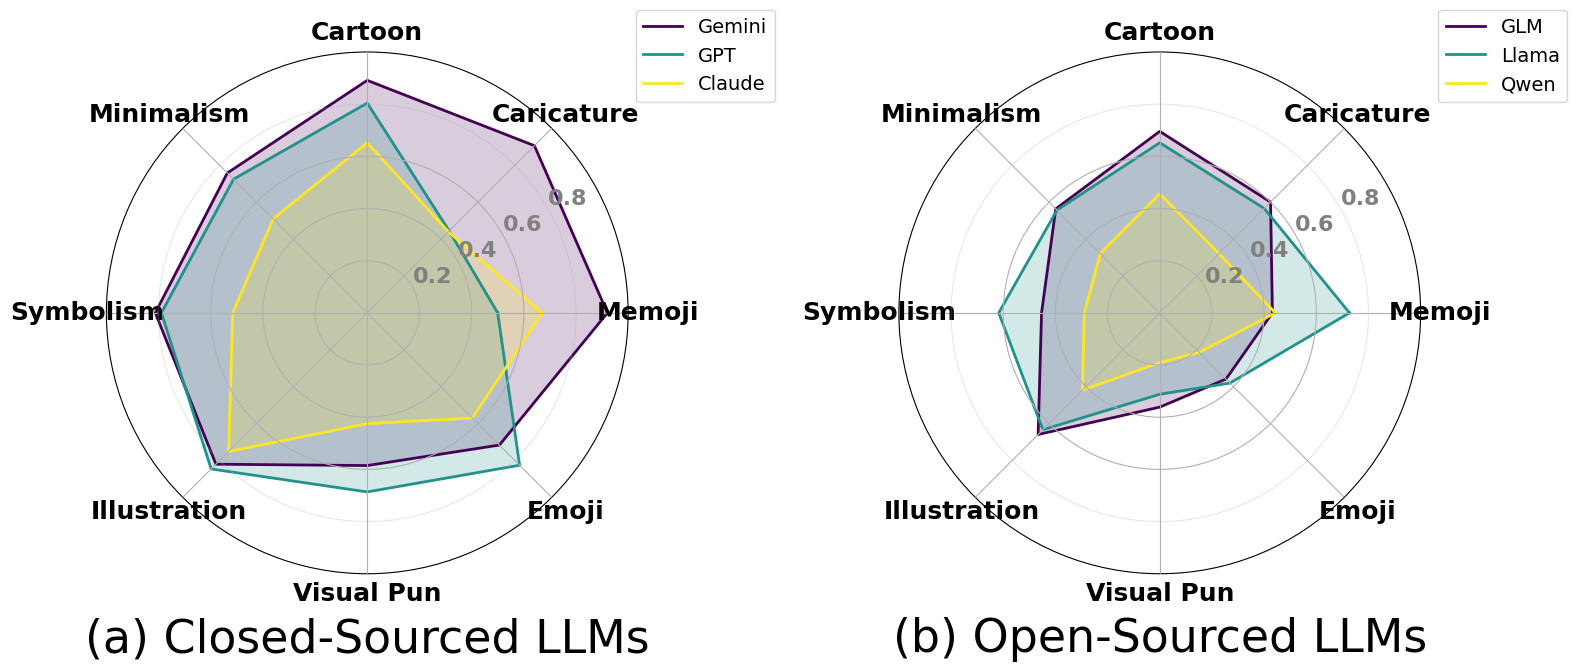

In [253]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data for each LLM (8 presentation methods)
llms = {
    "Gemini": [0.9205, 0.9062, 0.8913, 0.7584, 0.8125, 0.8204, 0.5853, 0.7165],
    "GPT":    [0.5,    0.4442, 0.8043, 0.7248, 0.7891, 0.8462, 0.6864, 0.8259],
    "Claude": [0.6705, 0.44,   0.6522, 0.5101, 0.5156, 0.7515, 0.4249, 0.5701],
    "GLM":    [0.4318, 0.6006, 0.6957, 0.5638, 0.4531, 0.6593, 0.3613, 0.3590],
    "Llama":  [0.7273, 0.5662, 0.6522, 0.557,  0.6172, 0.6335, 0.3121, 0.3806],
    "Qwen":   [0.4432, 0.3212, 0.4565, 0.3221, 0.2891, 0.4194, 0.1908, 0.2142]
}

# Presentation methods in the given order
presentation_methods = [
    "Memoji", "Caricature", "Cartoon", "Minimalism",
    "Symbolism", "Illustration", "Visual Pun", "Emoji"
]

# Grouping the LLMs into closed sourced and open sourced
closed_sourced = ["Gemini", "GPT", "Claude"]
open_sourced   = ["GLM", "Llama", "Qwen"]

# Number of presentation methods used
num_vars = len(presentation_methods)

# Compute angles for each axis (in radians)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]  # Complete the polygon by repeating the first angle

# Function to set up a radar chart's common layout with larger and bolder fonts
def setup_ax(ax):
    # Ensure gridlines are drawn below text by default
    ax.set_axisbelow(False)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(presentation_methods, fontsize=18, fontweight='bold')
    # Bring tick labels to the front
    for label in ax.get_xticklabels():
        label.set_zorder(10)
        
    ax.set_rlabel_position(30)
    yticks = [0.2, 0.4, 0.6, 0.8]
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(yt) for yt in yticks],
                       fontsize=16, color="grey", fontweight='bold')
    ax.set_ylim(0, 1)
    
    # Make the outer circle (the gridline at r=1) somewhat transparent.
    gridlines = ax.yaxis.get_gridlines()
    if gridlines:
        gridlines[-1].set_alpha(0.3)  # Adjust transparency for the outermost circle

# Create a figure with two radar subplots (one for each group)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

# Set common layout for each subplot
setup_ax(ax1)
setup_ax(ax2)

# Plotting closed sourced LLMs (left subplot)
colors1 = plt.cm.get_cmap("viridis", len(closed_sourced))
for idx, llm in enumerate(closed_sourced):
    values = llms[llm] + [llms[llm][0]]  # Complete the polygon loop
    ax1.plot(angles, values, linewidth=2, linestyle='solid', label=llm, color=colors1(idx))
    ax1.fill(angles, values, alpha=0.2, color=colors1(idx))
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=14)

# Plotting open sourced LLMs (right subplot)
colors2 = plt.cm.get_cmap("viridis", len(open_sourced))
for idx, llm in enumerate(open_sourced):
    values = llms[llm] + [llms[llm][0]]
    ax2.plot(angles, values, linewidth=2, linestyle='solid', label=llm, color=colors2(idx))
    ax2.fill(angles, values, alpha=0.2, color=colors2(idx))
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=14)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Add captions to each subplot at the bottom
ax1.text(0.5, -0.15, "(a) Closed-Sourced LLMs", transform=ax1.transAxes,
         ha='center', fontsize=33)
ax2.text(0.5, -0.15, "(b) Open-Sourced LLMs", transform=ax2.transAxes,
         ha='center', fontsize=33)

# Specify the output folder and file name
output_folder = "output_figures"
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, "radar_plot.png")

# Save the figure with tight spacing
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {output_path}")

plt.show()